In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
from imblearn.combine import SMOTETomek
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

header_list = ['sentiment','n', 'n1','n2','n3','text']
data = pd.read_csv('data.csv', names=header_list)
data.head()

,sentiment,n,n1,n2,n3,text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,@stellargirl I loooooooovvvvvveee my Kindle2. ...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs i...
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,"Ok, first assesment of the #kindle2 ...it fuck..."
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,@kenburbary You'll love your Kindle2. I've had...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,@mikefish Fair enough. But i have the Kindle2...


In [2]:
data['sentiment'].value_counts(), data.isna().sum()

(4    182
 0    177
 2    139
 Name: sentiment, dtype: int64,
 sentiment    0
 n            0
 n1           0
 n2           0
 n3           0
 text         0
 dtype: int64)

# 0 = negative, 2 = neutral, 4 = positive

In [3]:
#preprocessing
stemmer = PorterStemmer()
sentences = []
for i in range(len(data)):
    sentence2word = re.sub('[^a-zA-Z]', ' ', data['text'][i]).lower().split()
    sentence = ' '.join([stemmer.stem(word) for word in sentence2word if word not in stopwords.words('english')])
    data.iloc[i, data.columns.get_loc('text')] = sentence
    

In [4]:
data#data after preprocessing

,sentiment,n,n1,n2,n3,text
0,4,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,stellargirl loooooooovvvvvvee kindl dx cool fa...
1,4,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,read kindl love lee child good read
2,4,5,Mon May 11 03:18:54 UTC 2009,kindle2,chadfu,ok first asses kindl fuck rock
3,4,6,Mon May 11 03:19:04 UTC 2009,kindle2,SIX15,kenburbari love kindl mine month never look ba...
4,4,7,Mon May 11 03:21:41 UTC 2009,kindle2,yamarama,mikefish fair enough kindl think perfect
...,...,...,...,...,...,...
493,2,14072,Sun Jun 14 04:31:43 UTC 2009,latex,proggit,ask program latex indesign submit calcio link ...
494,0,14073,Sun Jun 14 04:32:17 UTC 2009,latex,sam33r,note hate word hate page hate latex said hate ...
495,4,14074,Sun Jun 14 04:36:34 UTC 2009,latex,iamtheonlyjosie,ahhh back real text edit environ lt latex
496,0,14075,Sun Jun 14 21:36:07 UTC 2009,iran,plutopup7,troubl iran see hmm iran iran far away flockof...


In [5]:
cv = CountVectorizer()
bow = cv.fit_transform(data['text']).toarray()
bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
x = bow
y = data['sentiment']

<AxesSubplot:>

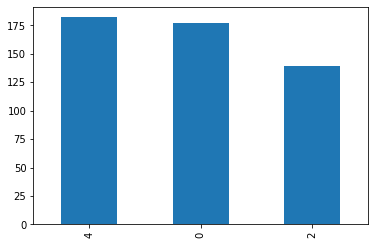

In [7]:
pd.value_counts(data['sentiment']).plot(kind='bar')

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [9]:
names = ["Nearest_Neighbors", "Linear_SVM", "Polynomial_SVM", "RBF_SVM", "Gaussian_Process",
         "Gradient_Boosting", "Decision_Tree", "Extra_Trees", "Random_Forest", "Neural_Net", "AdaBoost",
         "Naive_Bayes", "QDA", "SGD"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(kernel="poly", degree=3, C=0.025),
    SVC(kernel="rbf", C=1, gamma=2),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    ExtraTreesClassifier(n_estimators=10, min_samples_split=2),
    RandomForestClassifier(max_depth=5, n_estimators=100),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    MultinomialNB(),
    QuadraticDiscriminantAnalysis(),
    SGDClassifier(loss="hinge", penalty="l2")]

In [10]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    scores.append(score)

C:\Users\oct20\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\gaussian_process\kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
C:\Users\oct20\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [11]:
scores

[0.64,
 0.67,
 0.33,
 0.33,
 0.33,
 0.73,
 0.65,
 0.73,
 0.65,
 0.75,
 0.71,
 0.6,
 0.73,
 0.25]

In [16]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(AdaBoostClassifier(), {
    'n_estimators' : [100, 50, 500]
}, cv=5, return_train_score=False)
clf.fit(x_train, y_train)
result = pd.DataFrame(clf.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.130880,0.026549,0.060545,0.001853,100,{'n_estimators': 100},0.5375,0.4625,0.5625,0.632911,0.493671,0.537816,0.058777,3
1,0.567007,0.013675,0.030738,0.000616,50,{'n_estimators': 50},0.6000,0.5000,0.5500,0.620253,0.569620,0.567975,0.041725,1
2,5.627135,0.094135,0.303531,0.018818,500,{'n_estimators': 500},0.5375,0.5125,0.6125,0.569620,0.544304,0.555285,0.033901,2


In [17]:
clf.best_score_, clf.best_params_

(0.5679746835443038, {'n_estimators': 50})